# Novartis_Hack_Prediction

## Predict if the server will be Hacked

The Goal of this problem is to predict incidents which could cause potential hacks.

Based on historical incidents and logging parameters probable incidents which would result in hacks can be identified.

### Import essential libraries

    The following code block imports all the relevant libararies essential for the data preprocesssing, visualisation and model training and testing 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

In [2]:
# To ignore warning msgs

import warnings
warnings.filterwarnings("ignore")

In [3]:
# import dataset
df = pd.read_csv('Train.csv')
df_Test = pd.read_csv('Test.csv')

In [4]:
df.head() 

,INCIDENT_ID,DATE,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,X_10,X_11,X_12,X_13,X_14,X_15,MULTIPLE_OFFENSE
0,CR_102659,04-JUL-04,0,36,34,2,1,5,6,1,6,1,174,1.0,92,29,36,0
1,CR_189752,18-JUL-17,1,37,37,0,0,11,17,1,6,1,236,1.0,103,142,34,1
2,CR_184637,15-MAR-17,0,3,2,3,5,1,0,2,3,1,174,1.0,110,93,34,1
3,CR_139071,13-FEB-09,0,33,32,2,1,7,1,1,6,1,249,1.0,72,29,34,1
4,CR_109335,13-APR-05,0,33,32,2,1,8,3,0,5,1,174,0.0,112,29,43,1


## Data Preprocessing

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23856 entries, 0 to 23855
Data columns (total 18 columns):
INCIDENT_ID         23856 non-null object
DATE                23856 non-null object
X_1                 23856 non-null int64
X_2                 23856 non-null int64
X_3                 23856 non-null int64
X_4                 23856 non-null int64
X_5                 23856 non-null int64
X_6                 23856 non-null int64
X_7                 23856 non-null int64
X_8                 23856 non-null int64
X_9                 23856 non-null int64
X_10                23856 non-null int64
X_11                23856 non-null int64
X_12                23674 non-null float64
X_13                23856 non-null int64
X_14                23856 non-null int64
X_15                23856 non-null int64
MULTIPLE_OFFENSE    23856 non-null int64
dtypes: float64(1), int64(15), object(2)
memory usage: 3.3+ MB


### Missing values Imputation

X_12 feature has missing values from above info for the dataframe

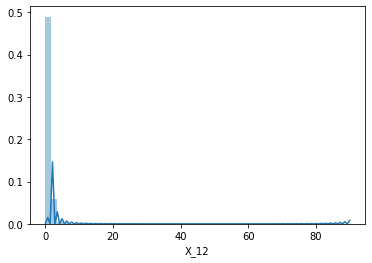

In [6]:
sns.distplot(df.X_12)

In [7]:
#Since the data is skewed towards oneside, lets use median to fill NaN values

df.X_12 = df.X_12.fillna(df.X_12.median())

In [8]:
df_Test.X_12 = df_Test.X_12.fillna(df_Test.X_12.median())

In [9]:
df.describe()

,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,X_10,X_11,X_12,X_13,X_14,X_15,MULTIPLE_OFFENSE
count,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000
mean,0.483778,24.791206,24.637450,4.276744,2.455609,6.154175,4.876509,0.972460,4.924128,1.244802,206.954519,0.974262,85.237383,72.674296,33.464747,0.955231
std,1.439738,15.240231,15.135093,2.944672,1.963095,4.471756,3.881931,1.453144,1.362625,1.119301,93.033348,1.163264,27.597226,43.297320,8.386834,0.206800
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,7.000000,8.000000,2.000000,1.000000,3.000000,2.000000,0.000000,5.000000,1.000000,174.000000,1.000000,72.000000,29.000000,34.000000,1.000000
50%,0.000000,24.000000,24.000000,4.000000,3.000000,5.000000,4.000000,1.000000,5.000000,1.000000,249.000000,1.000000,98.000000,62.000000,34.000000,1.000000
75%,0.000000,36.000000,35.000000,6.000000,5.000000,8.000000,7.000000,1.000000,6.000000,1.000000,249.000000,1.000000,103.000000,107.000000,34.000000,1.000000
max,7.000000,52.000000,52.000000,10.000000,5.000000,19.000000,18.000000,99.000000,6.000000,90.000000,332.000000,90.000000,116.000000,142.000000,50.000000,1.000000


### Determine Outliers for features

Use PAIRPLOT to find Distibution of all the features

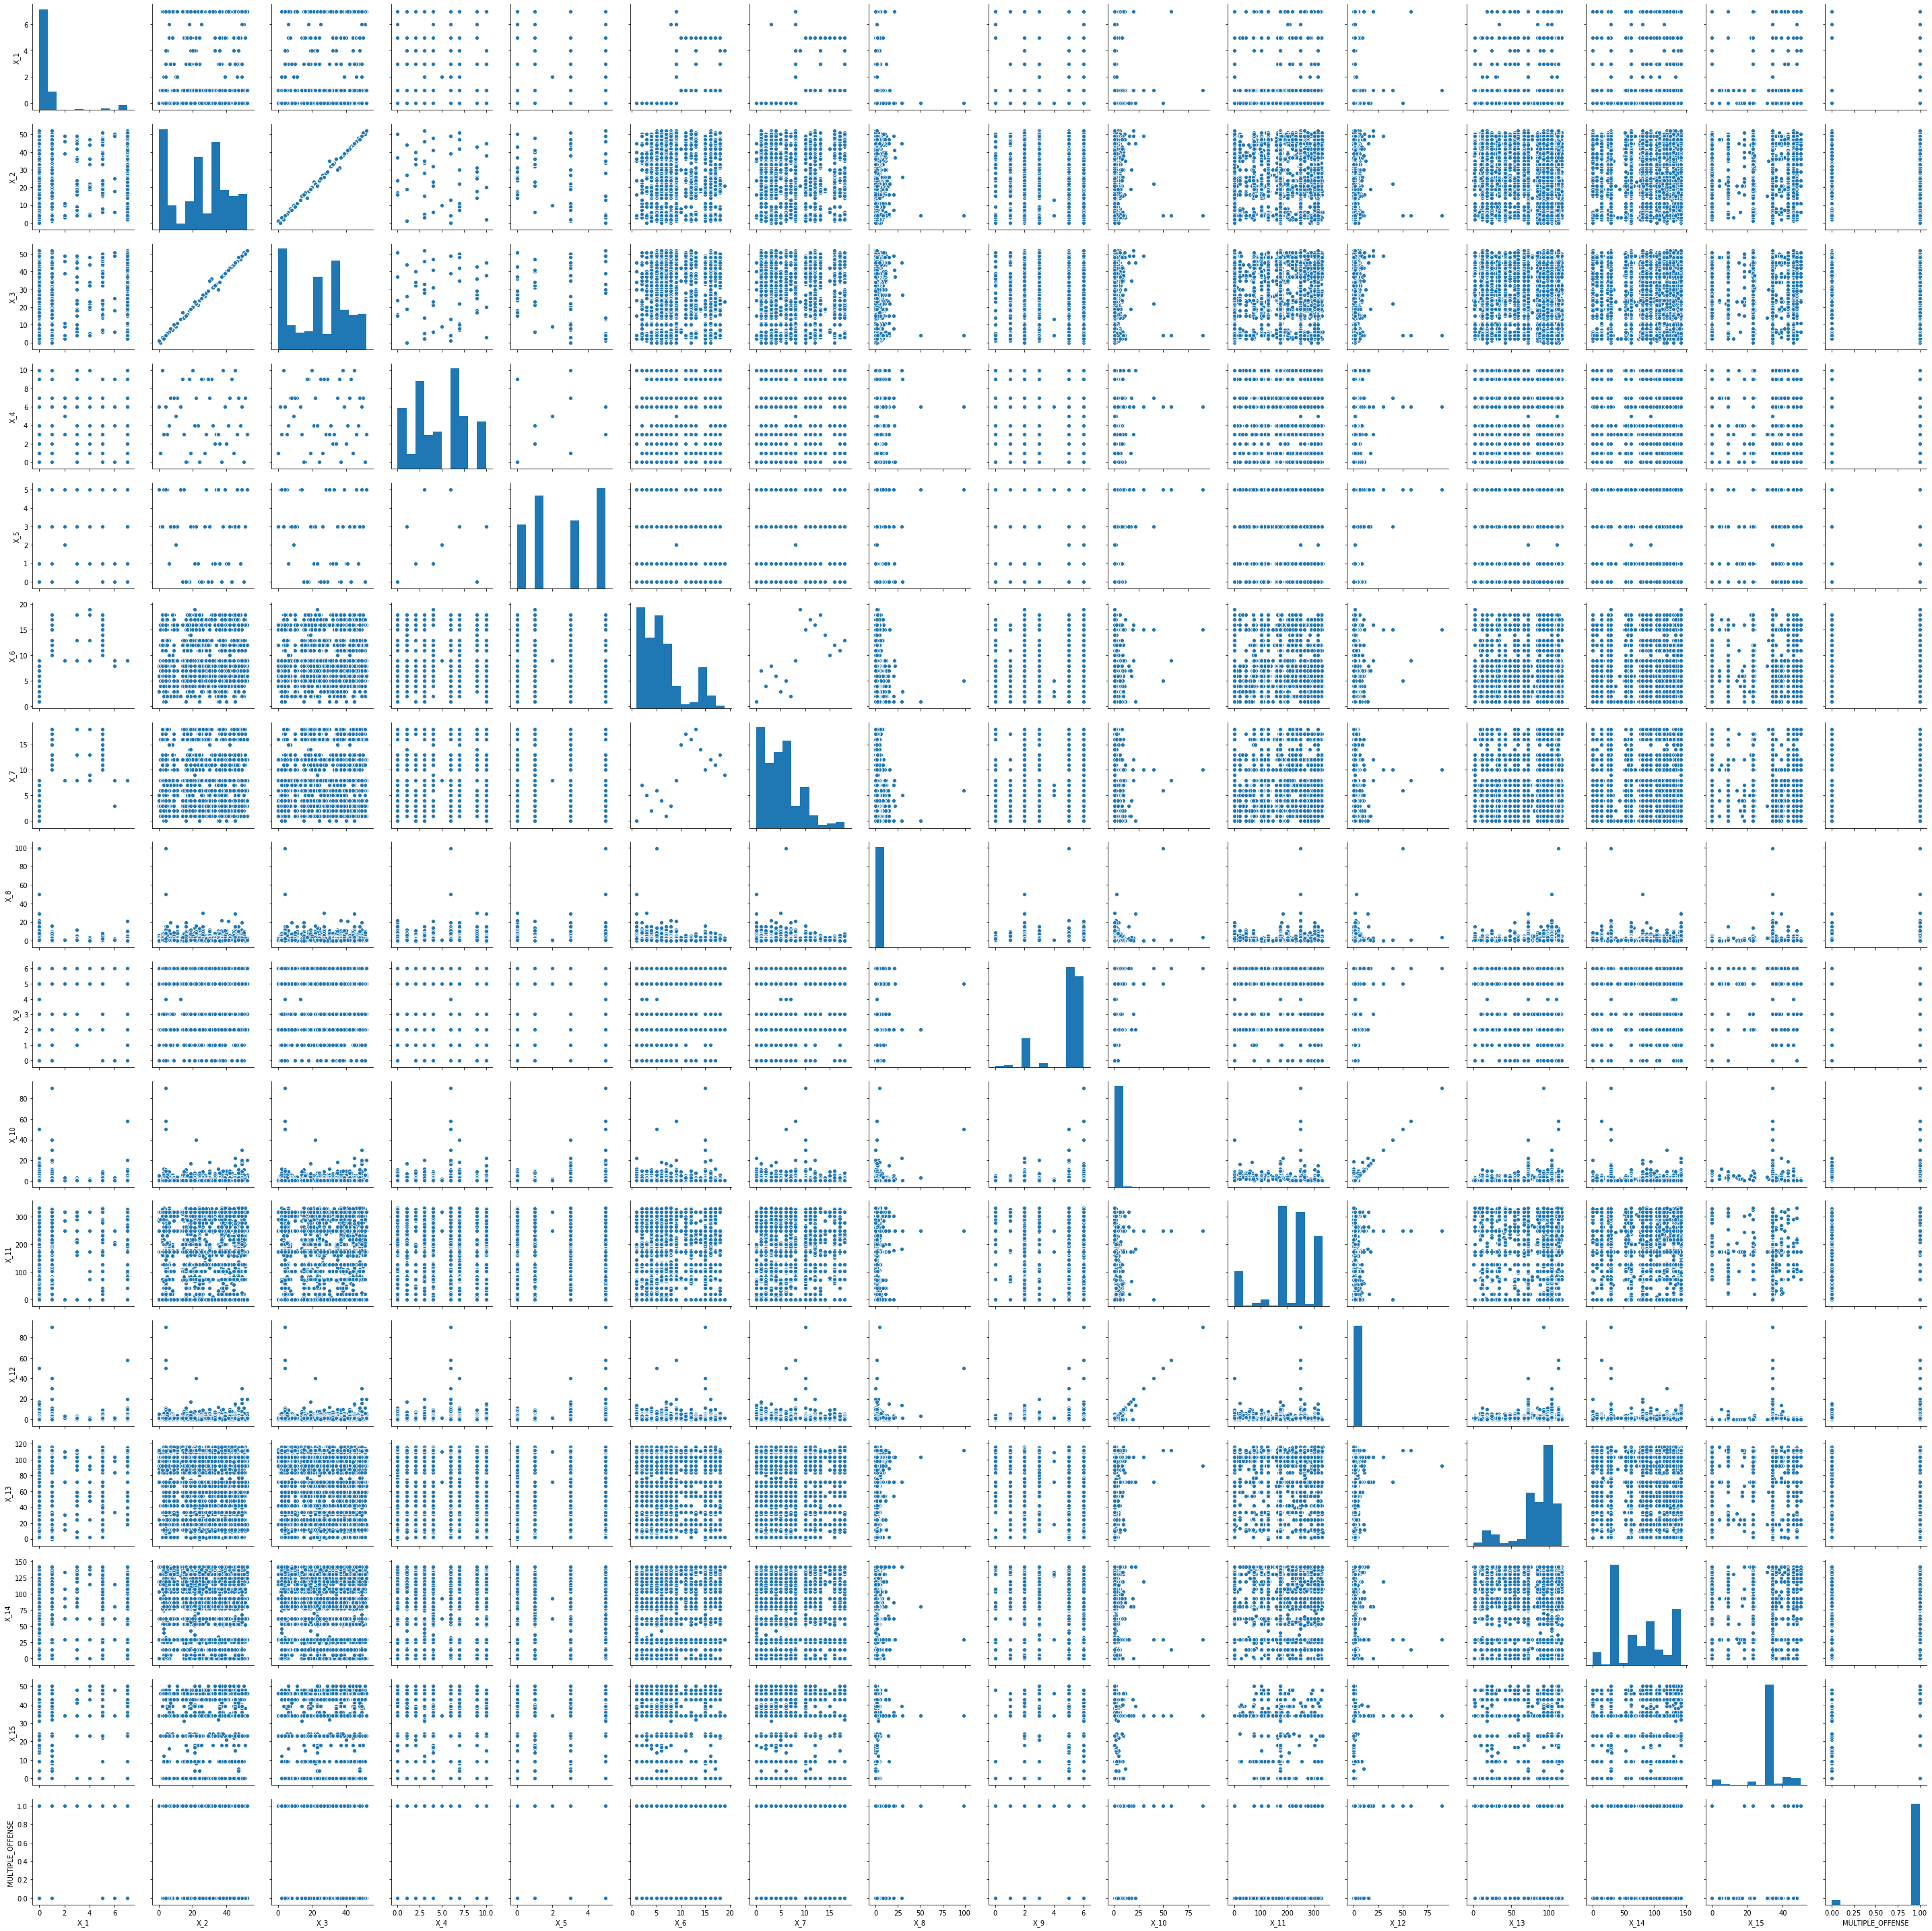

In [10]:
sns.pairplot(df)

From pariplot & describe info, we can see X_8, X_10 & X_12 features have outliers

Plot Boxplot graph to determine outliers for above features

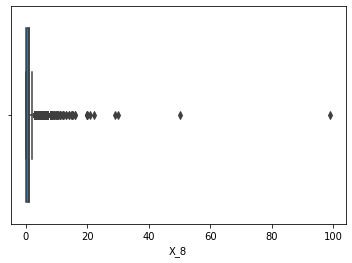

In [11]:
sns.boxplot(df.X_8)

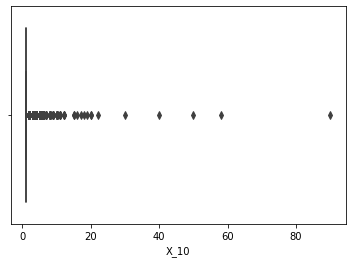

In [12]:
sns.boxplot(df.X_10)

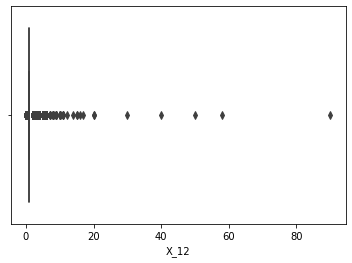

In [13]:
sns.boxplot(df.X_12)

Outliers conversion for X_8 feature

In [14]:
uv = np.percentile(df.X_8, [99.9] [0])
uv

14.0

In [15]:
df.X_8[df.X_8 > uv].count()

23

In [16]:
df.X_8[df.X_8 > uv] = uv

Outliers conversion for X_10 feature

In [17]:
uv = np.percentile(df.X_10, [99.9] [0])
uv

10.0

In [18]:
df.X_10[df.X_10 > uv].count()

21

In [19]:
df.X_10[df.X_10 > uv] = uv

Outliers conversion for X_12 feature

In [20]:
uv = np.percentile(df.X_12, [99.9] [0])
uv

9.145000000004075

In [21]:
df.X_12[df.X_12 > uv].count()

24

In [22]:
df.X_12[df.X_12 > uv] = 10

Distribution of Incidents Which caused hacks (Yes-1 or No-0) 

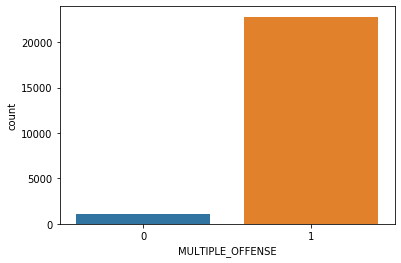

In [23]:
sns.countplot(x = df['MULTIPLE_OFFENSE'])

#### Target variable "MULTIPLE_OFFENSE" is imbalanced, so while evaluating "recall_score" should be preffered since our focus is 
#### on minimizing false negatives 

In [24]:
df.describe()

,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,X_10,X_11,X_12,X_13,X_14,X_15,MULTIPLE_OFFENSE
count,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000
mean,0.483778,24.791206,24.637450,4.276744,2.455609,6.154175,4.876509,0.963825,4.924128,1.232227,206.954519,0.962902,85.237383,72.674296,33.464747,0.955231
std,1.439738,15.240231,15.135093,2.944672,1.963095,4.471756,3.881931,1.223774,1.362625,0.720554,93.033348,0.804050,27.597226,43.297320,8.386834,0.206800
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,7.000000,8.000000,2.000000,1.000000,3.000000,2.000000,0.000000,5.000000,1.000000,174.000000,1.000000,72.000000,29.000000,34.000000,1.000000
50%,0.000000,24.000000,24.000000,4.000000,3.000000,5.000000,4.000000,1.000000,5.000000,1.000000,249.000000,1.000000,98.000000,62.000000,34.000000,1.000000
75%,0.000000,36.000000,35.000000,6.000000,5.000000,8.000000,7.000000,1.000000,6.000000,1.000000,249.000000,1.000000,103.000000,107.000000,34.000000,1.000000
max,7.000000,52.000000,52.000000,10.000000,5.000000,19.000000,18.000000,14.000000,6.000000,10.000000,332.000000,10.000000,116.000000,142.000000,50.000000,1.000000


### Attribute elimination of unique values from independent variables dataframe(X) 
### and target variable y creation from MULTIPLE_OFFENSE feature

In [25]:
X = df.drop(["INCIDENT_ID", "DATE", "MULTIPLE_OFFENSE"],axis=1)

y = df['MULTIPLE_OFFENSE']

In [26]:
X.shape

(23856, 15)

### Scaling data with MinMax Scaler to be btw 0 & 1

In [27]:
from sklearn.preprocessing import MinMaxScaler

In [28]:
sc = MinMaxScaler()
X_s = sc.fit_transform(X)

#### Model training and test dataset
  The following code blocks splits the dataset into trainig and testing datasets by applying 80-20 rule.
    Training data - 80%
    Test data - 20%

In [29]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_s,y,test_size=0.2,random_state=10)

X_train.shape

(19084, 15)

### Applying Sampling Technique to Imbalanced dataset - SMOTE

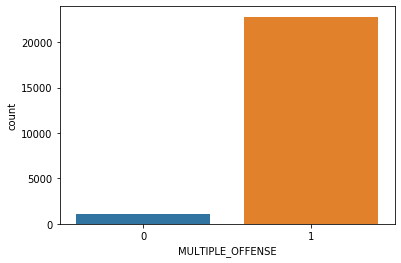

In [30]:
sns.countplot(x = df['MULTIPLE_OFFENSE'])

In [31]:
from imblearn.over_sampling import SMOTE 

Using TensorFlow backend.


#### SMOTE will increase the dataframe size and add dummy records to balance the target variable bias

In [32]:
sm = SMOTE(random_state=123)

In [33]:
X_train_s, y_train_s = sm.fit_sample(X_train, y_train)

In [34]:
X_train_s.shape

(36424, 15)

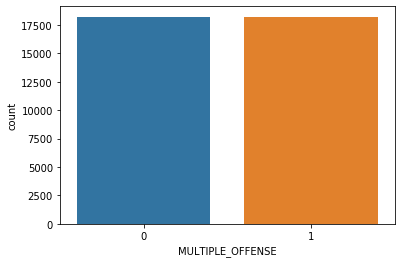

In [35]:
sns.countplot(x = y_train_s)

#### Now Target Variable is balanced, 
so it will prevent overfitting/underfitting issue 
when model is used with new Test records.

# Model Construction

    The following code blocks construct the Machine Learning models using the training dataset

## 1. Logistic Regression

    The following code builds and measures the prediction accuracy score of the Logistic Regression model 

In [36]:
from sklearn.linear_model import LogisticRegression

In [37]:
clf_lrs = LogisticRegression()

In [38]:
clf_lrs.fit(X_train_s,y_train_s)

LogisticRegression()

In [39]:
lr_y_pred = clf_lrs.predict(X_test)

Evaluation of Model:

In [40]:
from sklearn.metrics import accuracy_score, recall_score, confusion_matrix

In [41]:
confusion_matrix(y_test, lr_y_pred)

array([[ 163,   33],
       [ 405, 4171]])

In [42]:
clf_lrs_a = accuracy_score(y_test, lr_y_pred)
clf_lrs_a

0.9082145850796312

In [43]:
clf_lrs_r = recall_score(y_test, lr_y_pred)
clf_lrs_r

0.9114947552447552

## 2. Decision Tree


In [44]:
from sklearn.tree import DecisionTreeClassifier
model_dtree=DecisionTreeClassifier()
model_dtree.fit(X_train_s,y_train_s)

DecisionTreeClassifier()

In [45]:
dt_y_pred = model_dtree.predict(X_test)

In [46]:
dtree_r = recall_score(y_test, dt_y_pred)
dtree_r

0.9973776223776224

## 3. Random Forest


In [47]:
from sklearn.ensemble import RandomForestClassifier
model_rf = RandomForestClassifier(random_state=101)
model_rf.fit(X_train_s,y_train_s)

RandomForestClassifier(random_state=101)

In [48]:
rf_y_pred = model_rf.predict(X_test)

In [49]:
rf_r = recall_score(y_test, rf_y_pred)
rf_r

0.9978146853146853

## 4. SVC

In [50]:
from sklearn.svm import SVC
svc = SVC(kernel = 'rbf')
svc.fit(X_train_s,y_train_s)

SVC()

In [51]:
sv_y_pred = svc.predict(X_test)

In [52]:
sv_r = recall_score(y_test, sv_y_pred)
sv_r

0.9329108391608392

## 5. XGBoost

In [53]:
import xgboost as xgb
xgb_clf = xgb.XGBClassifier(max_depth = 5, n_estimators = 1000, learning_rate = 0.1, n_jobs = -1)

In [54]:
xgb_clf.fit(X_train_s,y_train_s)

XGBClassifier(max_depth=5, n_estimators=1000, n_jobs=-1)

In [55]:
xgb_y_pred = xgb_clf.predict(X_test)

In [56]:
confusion_matrix(y_test, xgb_y_pred)

array([[ 192,    4],
       [  10, 4566]])

In [57]:
xgb_r = recall_score(y_test, xgb_y_pred)
xgb_r

0.9978146853146853

## Machine Learning Models - Recall_Score comparison

    The following code blocks compares the performance of the different constructed ML models by measuring their recall_score

In [58]:
# data of Models & Accuracy

acc_data = [['Logistic Regression', clf_lrs_r], ['Decision Tree', dtree_r],
            ['Random Forrest', rf_r], ['SVC', sv_r], ['XGBoost', xgb_r] ] 

In [59]:
# Create DataFrame for Models & Accuracy

acc_df = pd.DataFrame(acc_data, columns = ['Model', 'Recall_Score']) 
acc_df

,Model,Recall_Score
0,Logistic Regression,0.911495
1,Decision Tree,0.997378
2,Random Forrest,0.997815
3,SVC,0.932911
4,XGBoost,0.997815


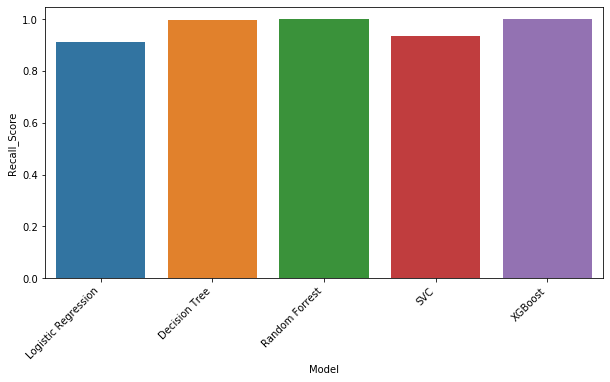

In [60]:
#Plot Model vs Accuracy

plt.figure(figsize=(10,5))
acc_chart = sns.barplot(x="Model", y="Recall_Score", data=acc_df)
acc_chart.set_xticklabels(acc_chart.get_xticklabels(), rotation=45, horizontalalignment='right')
acc_chart

### Inference:

    Based on the recall_score of various models, 
    we can choose #Random Forest/XGBoost for our business case which yeilds best #recall_score of 0.997815.
 
 ### Predict the incidents from test file whether they would cause hacks or not.

In [61]:
X = df_Test.drop(["INCIDENT_ID", "DATE"],axis=1)
X_s = sc.fit_transform(X)

Using XGBoost Trained model to predict results

In [69]:
xgb_y_pred = xgb_clf.predict(X_s)

Concatenate the predicted results with test file's Incident_Id and export results

In [70]:
df_Test['MULTIPLE_OFFENSE'] = xgb_y_pred

In [71]:
df_Test_Export = pd.DataFrame(df_Test, columns = ['INCIDENT_ID', 'MULTIPLE_OFFENSE']) 

In [72]:
df_Test_Export.head(20)

,INCIDENT_ID,MULTIPLE_OFFENSE
0,CR_195453,1
1,CR_103520,1
2,CR_196089,1
3,CR_112195,1
4,CR_149832,1
5,CR_81654,1
6,CR_139009,1
7,CR_6108,1
8,CR_62283,1
9,CR_5710,0


In [73]:
df_Test_Export.to_csv('Predicted_results.csv', index=False)